In [1]:
import json
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import collections
from collections import Counter
from grafici import htcl_distribution, feebase_distribution, feerate_distribution

In [2]:
ln = nx.read_gml('grafodef.gml')

In [4]:
#per calcolare le distribuzioni

htcl1 = [int(c) for (u, v, c) in ln.edges.data('MINHTLC1') ]
htcl2 = [int(c) for (u, v, c) in ln.edges.data('MINHTLC2')]
htcl = htcl1+htcl2 
feebase1 = [c for (u, v, c) in ln.edges.data('FEEBASE1')]
feebase2 = [c for (u, v, c) in ln.edges.data('FEEBASE2')]
feebase = feebase1 + feebase2
feerate1 = [int(c) for (u, v, c) in ln.edges.data('FEERATE1')]
feerate2 = [int(c) for (u, v, c) in ln.edges.data('FEERATE2')]
feerate = feerate1 + feerate2

In [5]:
htclcounter1 = collections.Counter(htcl1)
htclcounter2 = collections.Counter(htcl2)
feebasecounter1 = collections.Counter(feebase1)
feebasecounter2 = collections.Counter(feebase2)
feeratecounter1 = collections.Counter(feerate1)
feeratecounter2 = collections.Counter(feerate)

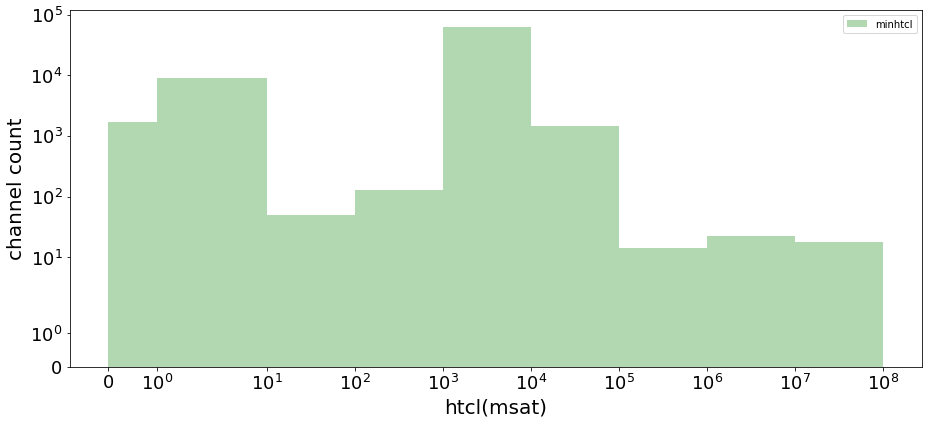

In [6]:
#calcolo istogramma della distrubuzione dei valori di htcl
htcl_distribution(htcl)

In [7]:
#calcolo percentuali dei valori di htcl
zero = 0
uno = 0
dieci = 0
cento = 0
mille = 0
diecimila = 0
centomila = 0
mil = 0
diecimil = 0
centomil = 0


for key in htclcounter1.keys():
    if int(key) <= 0 :
        zero+= htclcounter1[key]
    if int(key) <= 10 :
        dieci+= htclcounter1[key]
    if int(key) <= 100 :
        cento+= htclcounter1[key]
    if int(key) <= 1000 :
        mille+= htclcounter1[key]
    if int(key) <= 10000 :
        diecimila+= htclcounter1[key]
    if int(key) <= 100000 :
        centomila+= htclcounter1[key]
    if int(key) <= 1000000 :
        mil+= htclcounter1[key]
    if int(key) <= 10000000 :
        diecimil+= htclcounter1[key] 
    if int(key) <= 100000000 :
        centomil+= htclcounter1[key]
        
print("La percentuale di canali con minhtcl1 <= 0 è ", str(round(zero*100/len(htcl1),3)), "%")
print("La percentuale di canali con minhtcl1 <= 10 è ", str(round(dieci*100/len(htcl1),3)), "%")
print("La percentuale di canali con minhtcl1 <= 100 è ", str(round(cento*100/len(htcl1),3)), "%")
print("La percentuale di canali con minhtcl1 <= 1000 è ", str(round(mille*100/len(htcl1),3)), "%")
print("La percentuale di canali con minhtcl1 <= 10000 è ", str(round(diecimila*100/len(htcl1),3)), "%")
print("La percentuale di canali con minhtcl1 <= 100000 è ", str(round(centomila*100/len(htcl1),3)), "%")
print("La percentuale di canali con minhtcl1 <= 1000000 è ", str(round(mil*100/len(htcl1),3)), "%")
print("La percentuale di canali con minhtcl1 <= 10000000 è ", str(round(diecimil*100/len(htcl1),3)), "%")
print("La percentuale di canali con minhtcl1 <= 100000000 è ", str(round(centomil*100/len(htcl1),3)), "%")


La percentuale di canali con minhtcl1 <= 0 è  15.114 %
La percentuale di canali con minhtcl1 <= 10 è  24.894 %
La percentuale di canali con minhtcl1 <= 100 è  25.02 %
La percentuale di canali con minhtcl1 <= 1000 è  97.875 %
La percentuale di canali con minhtcl1 <= 10000 è  99.877 %
La percentuale di canali con minhtcl1 <= 100000 è  99.951 %
La percentuale di canali con minhtcl1 <= 1000000 è  99.972 %
La percentuale di canali con minhtcl1 <= 10000000 è  99.998 %
La percentuale di canali con minhtcl1 <= 100000000 è  100.0 %


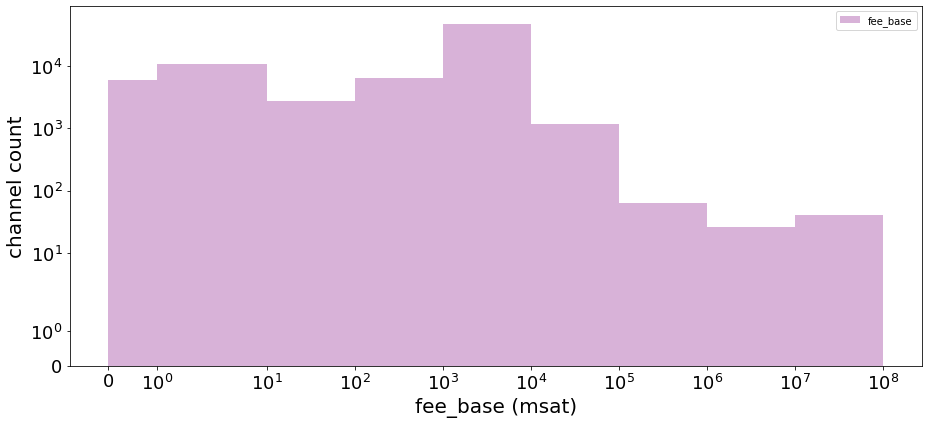

In [8]:

feebase_distribution(feebase)

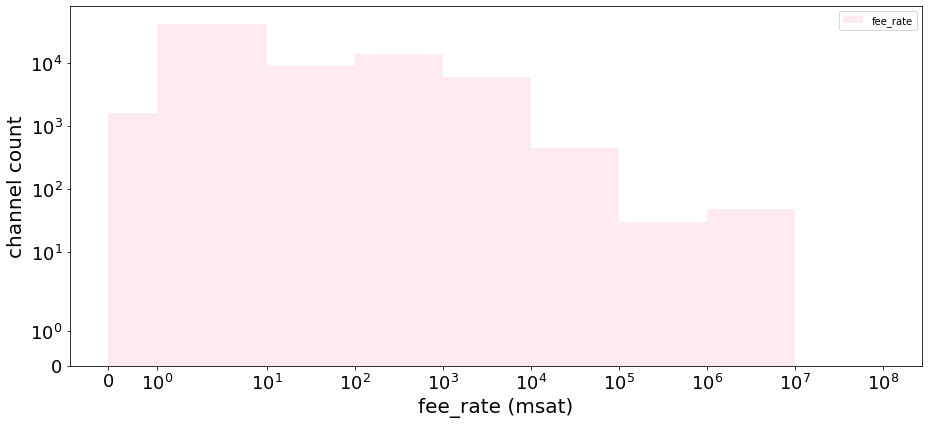

In [9]:
feerate_distribution(feerate)

In [10]:
zero = 0
uno = 0
dieci = 0
cento = 0
mille = 0
diecimila = 0
centomila = 0
mil = 0
diecimil = 0
miliardo = 0

In [11]:
for key in feeratecounter1.keys():
    if int(key) <= 0 :
        zero+= feeratecounter1[key]
    if int(key) <= 10 :
        dieci+= feeratecounter1[key]
    if int(key) <= 100 :
        cento+= feeratecounter1[key]
    if int(key) <= 1000 :
        mille+= feeratecounter1[key]
    if int(key) <= 10000 :
        diecimila+= feeratecounter1[key]
    if int(key) <= 100000 :
        centomila+= feeratecounter1[key]
    if int(key) <= 1000000 :
        mil+= feeratecounter1[key]
    if int(key) <= 10000000 :
        diecimil+= feeratecounter1[key]
    if int(key) <= 1000000000 :
        miliardo+= feeratecounter1[key]
        
        
print("La percentuale di canali con feerate2 <= 0 è ", str(round(zero*100/len(feerate1),3)), "%")
print("La percentuale di canali con feerate2 <= 10 è ", str(round(dieci*100/len(feerate1),3)), "%")
print("La percentuale di canali con feerate2 <= 100 è ", str(round(cento*100/len(feerate1),3)), "%")
print("La percentuale di canali con feerate2 <= 1000 è ", str(round(mille*100/len(feerate1),3)), "%")
print("La percentuale di canali con feerate2 <= 10000 è ", str(round(diecimila*100/len(feerate1),3)), "%")
print("La percentuale di canali con feerate2 <= 100000 è ", str(round(centomila*100/len(feerate1),3)), "%")
print("La percentuale di canali con feerate2 <= 1000000 è ", str(round(mil*100/len(feerate1),3)), "%")
print("La percentuale di canali con feerate2 <= 10000000 è ", str(round(diecimil*100/len(feerate1),3)), "%")
print("La percentuale di canali con feerate2 <= 1000000000 è ", str(round(miliardo*100/len(feerate1),3)), "%")

La percentuale di canali con feerate2 <= 0 è  14.932 %
La percentuale di canali con feerate2 <= 10 è  70.682 %
La percentuale di canali con feerate2 <= 100 è  80.465 %
La percentuale di canali con feerate2 <= 1000 è  97.096 %
La percentuale di canali con feerate2 <= 10000 è  99.646 %
La percentuale di canali con feerate2 <= 100000 è  99.909 %
La percentuale di canali con feerate2 <= 1000000 è  99.946 %
La percentuale di canali con feerate2 <= 10000000 è  99.956 %
La percentuale di canali con feerate2 <= 1000000000 è  100.0 %


In [12]:
zero = 0
uno = 0
dieci = 0
cento = 0
mille = 0
diecimila = 0
centomila = 0
mil = 0
diecimil = 0
miliardo = 0

for key in feeratecounter2.keys():
    if int(key) <= 0 :
        zero+= feeratecounter2[key]
    if int(key) <= 10 :
        dieci+= feeratecounter2[key]
    if int(key) <= 100 :
        cento+= feeratecounter2[key]
    if int(key) <= 1000 :
        mille+= feeratecounter2[key]
    if int(key) <= 10000 :
        diecimila+= feeratecounter2[key]
    if int(key) <= 100000 :
        centomila+= feeratecounter2[key]
    if int(key) <= 1000000 :
        mil+= feeratecounter2[key]
    if int(key) <= 10000000 :
        diecimil+= feeratecounter2[key]
    if int(key) <= 1000000000 :
        miliardo+= feeratecounter2[key]
        
        
print("La percentuale di canali con feerate2 <= 0 è ", str(round(zero*100/len(feerate2),3)), "%")
print("La percentuale di canali con feerate2 <= 10 è ", str(round(dieci*100/len(feerate2),3)), "%")
print("La percentuale di canali con feerate2 <= 100 è ", str(round(cento*100/len(feerate2),3)), "%")
print("La percentuale di canali con feerate2 <= 1000 è ", str(round(mille*100/len(feerate2),3)), "%")
print("La percentuale di canali con feerate2 <= 10000 è ", str(round(diecimila*100/len(feerate2),3)), "%")
print("La percentuale di canali con feerate2 <= 100000 è ", str(round(centomila*100/len(feerate2),3)), "%")
print("La percentuale di canali con feerate2 <= 1000000 è ", str(round(mil*100/len(feerate2),3)), "%")
print("La percentuale di canali con feerate2 <= 10000000 è ", str(round(diecimil*100/len(feerate2),3)), "%")
print("La percentuale di canali con feerate2 <= 1000000000 è ", str(round(miliardo*100/len(feerate2),3)), "%")

La percentuale di canali con feerate2 <= 0 è  30.097 %
La percentuale di canali con feerate2 <= 10 è  137.439 %
La percentuale di canali con feerate2 <= 100 è  158.549 %
La percentuale di canali con feerate2 <= 1000 è  192.086 %
La percentuale di canali con feerate2 <= 10000 è  198.93 %
La percentuale di canali con feerate2 <= 100000 è  199.763 %
La percentuale di canali con feerate2 <= 1000000 è  199.9 %
La percentuale di canali con feerate2 <= 10000000 è  199.923 %
La percentuale di canali con feerate2 <= 1000000000 è  199.995 %


ROOTS

In [24]:
root_prop= {} #struttura per memorizzare i nodi radice e le loro proprietà

for node in ln.nodes():
    
    for n in ln.neighbors(node): #scorro i vicini
        if ln.degree(n) == 1: #se almeno un vicino è una rosa avrò nel dict "root_prop" un campo relativo al nodo node
            root_prop[node] = {'degree': int, 'roses': [], 'blue': [], 'percent_roses': int } 
    
    #if one == 1: #se tutti i vicini hanno grado = 1 (sono rose)
        

for node in root_prop.keys():
    for n in ln.neighbors(node): 
        if ln.degree(n) == 1:
            root_prop[node]['roses'].append(n) #roses contiene i vicini che sono rose (grado=1)
        else:
            root_prop[node]['blue'].append(n) #blue contiene i vicini che non sono rose (grado >1)
                
    
    root_prop[node]['degree'] = (ln.degree(node))
    #percent_roses rappresenta in percentuale la proporzione di rose a cui il nodo è collegato rispetto ai nodi blue
    root_prop[node]['percent_roses']=(float(len(root_prop[node]['roses']) / ln.degree(node) * 100)) 

In [25]:
display(root_prop)

{'03bd3466efd4a7306b539e2314e69efc6b1eaee29734fcedd78cf81b1dde9fedf8': {'degree': 3,
  'roses': ['03c3d14714b78f03fd6ea4997c2b540a4139258249ea1d625c03b68bb82f85d0ea',
   '0269ba746a03bb9b8225c4e78a85b5b8674a5b45ac425860944922460e94241932'],
  'blue': ['03cbf298b068300be33f06c947b9d3f00a0f0e8089da3233f5db37e81d3a596fe1'],
  'percent_roses': 66.66666666666666},
 '02eccebd9ed98f6d267080a58194dbe554a2b33d976eb95bb7c116d00fd64c4a13': {'degree': 18,
  'roses': ['03bbfa47fb638200e2369c31589d5bc04a4b12b2f7a3cb4b1977bb1e467e3d2aef',
   '03b1f5e0dba78daa1f5a64a9a0cb032f774267feff3ecef2cdedb268d00876975f',
   '029a835162c9f4fa904524cc78e06fcf54b75ec70db23ffbc4642c851c90771779',
   '02c8cde4c1e8019db5e8cba5af686d13a9a863aaf0d287156edc4829ee490e8d65'],
  'blue': ['02ee4469f2b686d5d02422917ac199602ce4c366a7bfaac1099e3ade377677064d',
   '022e74ed3ddd3f590fd6492e60b20dcad7303f17e1ffd882fb33bb3f6c88f64398',
   '03cbf298b068300be33f06c947b9d3f00a0f0e8089da3233f5db37e81d3a596fe1',
   '03b7ca940bc33b882dc

In [14]:
print(len(root_prop))

1043


In [3]:
largest_component = ln.subgraph(max(nx.connected_components(ln),key=len))
#nx.write_gml(largest_component, "largest_component.gml") 

In [26]:
#applico l'algoritmo di ricerca dei nodi radice solo alla componente principale, mi aspetto che vengano individuati meno nodi 
#rispetto al caso precedente che presumibilmente individuava anche i nodi "nel contorno della rete"

root_prop_largest = {} #struttura per memorizzare i nodi radice e le loro proprietà

for node in largest_component.nodes():
    for n in largest_component.neighbors(node): #scorro i vicini
        if largest_component.degree(n) == 1: #se almeno un vicino è una rosa avrò nel dict "root_prop" un campo relativo al nodo node
            root_prop_largest[node] = {'degree': int, 'roses': [], 'blue': [], 'percent_roses': int} 
        

for node in root_prop_largest.keys():
    for n in largest_component.neighbors(node): 
        if largest_component.degree(n) == 1:
            root_prop_largest[node]['roses'].append(n) #roses contiene i vicini che sono rose (grado=1)
        else:
            root_prop_largest[node]['blue'].append(n) #blue contiene i vicini che non sono rose (grado >1)
                
    
    root_prop_largest[node]['degree'] = largest_component.degree(node)
    #percent_roses rappresenta in percentuale la proporzione di rose a cui il nodo è collegato rispetto ai nodi blue
    root_prop_largest[node]['percent_roses'] = float(len(root_prop_largest[node]['roses']) / largest_component.degree(node) * 100)


In [8]:
print(len(root_prop_largest))

914


In [ ]:
display(root_prop_largest)

In [43]:
#memorizzo i nodi che sono collegati a più nodi rossi (rose) che blu
selected_nodes = {}

for node in root_prop_largest.keys():
    if(root_prop_largest[node]['percent_roses'] > 50 and root_prop_largest[node]['degree'] > 50):
        selected_nodes[node]= root_prop_largest[node]

In [44]:
len(selected_nodes)

9

In [4]:
root_prop_2 = {}

for node in largest_component.nodes():
    for n in largest_component.neighbors(node): #scorro i vicini
        if largest_component.degree(n) == 1 : #se almeno un vicino è una rosa avrò nel dict "root_prop" un campo relativo al nodo node
            root_prop_2[node] = {'degree': int, 'roses': [], 'roses2' : [], 'blue': [], 'percent_roses': int } 
        elif largest_component.degree(n) >= 1:
            if 
        

for node in root_prop_2.keys():
    for n in largest_component.neighbors(node): 
        if largest_component.degree(n) == 1:
            root_prop_2[node]['roses'].append(n) #roses contiene i vicini che sono rose (grado=1)
        else:
            for nbr in largest_component.neighbors(n):
                if largest_component.degree(nbr) == 1:
                    root_prop_2[node]['roses2'].append(n)
                else:
                    root_prop_2[node]['blue'].append(n) #blue contiene i vicini che non sono rose (grado >1)
                
    
    root_prop_2[node]['degree'] = largest_component.degree(node)
    #percent_roses rappresenta in percentuale la proporzione di rose a cui il nodo è collegato rispetto ai nodi blue
    root_prop_2[node]['percent_roses'] = float(len(root_prop_2[node]['roses']) / largest_component.degree(node) * 100)


KeyboardInterrupt: 